<a href="https://colab.research.google.com/github/ErbolTakhirov/Learning-notebooks/blob/main/pandas/merge_join_concat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Объединение таблиц

pd.merge() — это метод, который используется для объединения двух датафреймов или серий по столбцам или индексам.
[документация](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)

# Pandas Merge

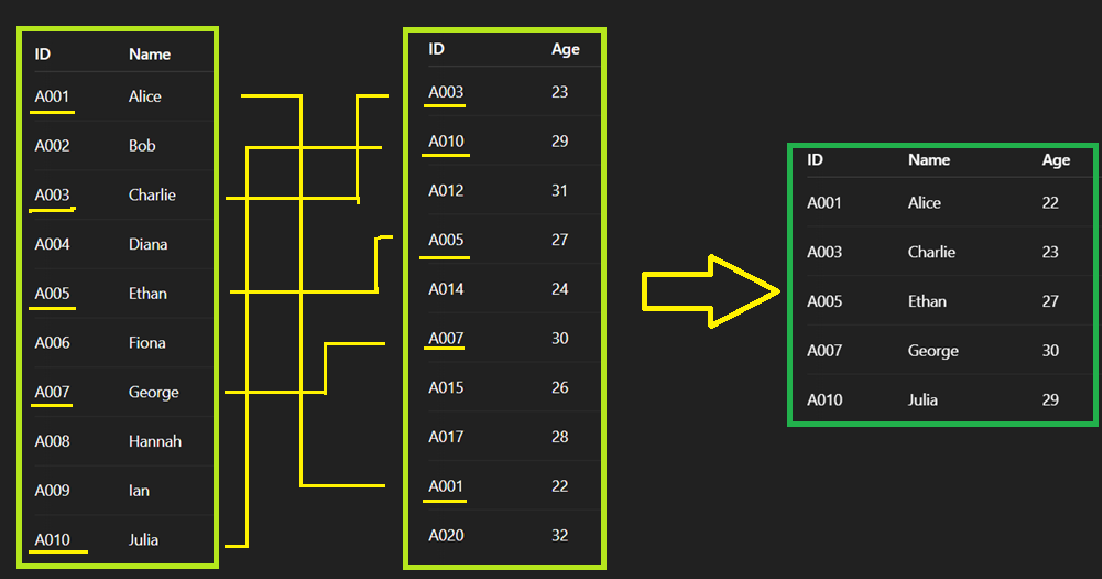

Параметры функции `pandas.merge()` используются для настройки операции объединения (merge) двух DataFrame в Pandas. Вот основные параметры, которые можно указать при использовании merge():


* `left`: Левый DataFrame, который будет использоваться для объединения.
* `right`: Правый DataFrame, с которым будет производиться объединение.
* `how`: Определяет тип объединения. Возможные значения: 'inner' (внутреннее объединение), 'outer' (внешнее объединение), 'left' (левое объединение), 'right' (правое объединение). Значение по умолчанию - 'inner'.
* `on`: Столбец или список столбцов, по которым будет производиться объединение. Если не указан, используются все общие столбцы с одинаковыми именами в обоих DataFrame.
* `left_on` и `right_on`: Столбцы или списки столбцов в левом и правом DataFrame соответственно, по которым будет производиться объединение, если имена столбцов отличаются.
* `left_index` и `right_index`: Логические значения, указывающие, следует ли использовать индексы левого и/или правого DataFrame для объединения вместо столбцов.
* `suffixes`: Список суффиксов, которые будут добавлены к именам столбцов, если имена столбцов в левом и правом DataFrame конфликтуют. По умолчанию используются суффиксы '_x' и '_y'.
* `sort`: Логическое значение, указывающее, следует ли сортировать объединенный DataFrame по столбцам. Значение по умолчанию - False.

## How

* **inner** (по умолчанию): включает только те строки, для которых значения в сопоставляемых столбцах или индексах обоих DataFrame совпадают.
* **left**: включает все строки из левого (первого) DataFrame и только совпадающие строки из правого (второго) DataFrame. Если значения в сопоставляемых столбцах или индексах не совпадают, то для правого DataFrame будут добавлены значения NaN.
* **right**: включает все строки из правого (второго) DataFrame и только совпадающие строки из левого (первого) DataFrame. Если значения в сопоставляемых столбцах или индексах не совпадают, то для левого DataFrame будут добавлены значения NaN.
* **outer**: включает все строки из обоих DataFrame и заполняет значениями NaN для неподходящих сопоставлений.

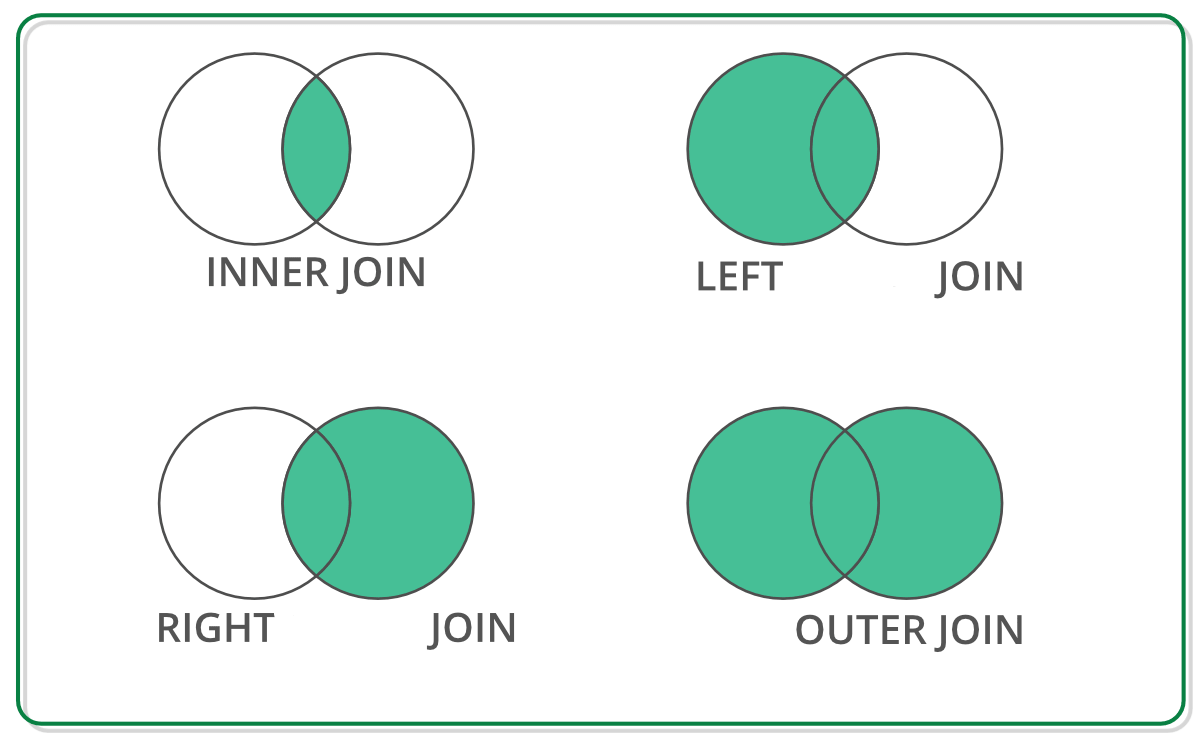

In [ ]:
# Простой пример

df1 = pd.DataFrame({'key': ['foo', 'bar', 'baz', 'dd'],
                    'value': [1, 2, 3, 5],
                    'moped': [11, 13, 14, 16]})

df2 = pd.DataFrame({'key': ['foo', 'bar', 'ss', 'hh'],
                    'value': [5, 6, 7, 8],
                    'samokat': [11, 13, 51, 61]})

df1, df2

(   key  value  moped
 0  foo      1     11
 1  bar      2     13
 2  baz      3     14
 3   dd      5     16,
    key  value  samokat
 0  foo      5       11
 1  bar      6       13
 2   ss      7       51
 3   hh      8       61)

In [ ]:
df1.merge(df2)

,key,value,moped,samokat


In [ ]:
df1.merge(df2, on='key', how='inner') # попробуйте разные варианты объединения

,key,value_x,moped,value_y,samokat
0,foo,1,11,5,11
1,bar,2,13,6,13


In [ ]:
df1.merge(df2, on='key', how='left')

,key,value_x,moped,value_y,samokat
0,foo,1,11,5.0,11.0
1,bar,2,13,6.0,13.0
2,baz,3,14,NaN,NaN
3,dd,5,16,NaN,NaN


In [ ]:
df1.merge(df2, on='key', how='left', suffixes = ('_df1', '_df2'))

,key,value_df1,moped,value_df2,samokat
0,foo,1,11,5.0,11.0
1,bar,2,13,6.0,13.0
2,baz,3,14,NaN,NaN
3,dd,5,16,NaN,NaN


In [ ]:
df1.merge(df2, on='key', how='right', suffixes = ('_df1', '_df2'))

,key,value_df1,moped,value_df2,samokat
0,foo,1.0,11.0,5,11
1,bar,2.0,13.0,6,13
2,ss,NaN,NaN,7,51
3,hh,NaN,NaN,8,61


In [ ]:
df1.merge(df2, on='value', how='left', suffixes = ('_df1', '_df2'))

,key_df1,value,moped,key_df2,samokat
0,foo,1,11,NaN,NaN
1,bar,2,13,NaN,NaN
2,baz,3,14,NaN,NaN
3,dd,5,16,foo,11.0


In [ ]:
zones = pd.read_csv('taxi-zone-lookup.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Создание датасета.
Не забудьте загрузить датасет **zones** выше, прежде чем запускать эти ячейки !!!

In [ ]:
df = sns.load_dataset('taxis')

In [ ]:
df = df.merge(zones, left_on='pickup_zone', right_on='Zone')

In [ ]:
df = df.reindex(columns=['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip','payment',
       'LocationID'])

In [ ]:
df.rename({'LocationID':'PickUpLocationID'}, axis=1, inplace=True)

In [ ]:
day_one = df[df['pickup'].dt.date == pd.to_datetime('2019-03-24').date()].sort_values('pickup').head(17).reset_index(drop=True)
day_two = df[df['pickup'].dt.date == pd.to_datetime('2019-03-25').date()].sort_values('pickup').head(20).reset_index(drop=True)

# Изучим наши данные

In [ ]:
day_one

,pickup,dropoff,passengers,distance,fare,tip,payment,PickUpLocationID
0,2019-03-24 00:12:23,2019-03-24 00:13:56,1,0.15,3.0,0.00,cash,225
1,2019-03-24 00:12:23,2019-03-24 00:27:21,3,7.20,22.0,6.30,credit card,138
2,2019-03-24 00:13:15,2019-03-24 00:28:27,1,2.40,11.5,3.05,credit card,48
3,2019-03-24 00:14:55,2019-03-24 00:21:13,1,0.96,6.5,1.56,credit card,25
4,2019-03-24 00:15:26,2019-03-24 00:35:30,1,4.94,18.0,4.00,credit card,112
5,2019-03-24 00:27:46,2019-03-24 00:35:12,1,1.60,7.5,2.25,credit card,249
6,2019-03-24 00:44:57,2019-03-24 00:50:04,1,1.20,6.0,1.95,credit card,48
7,2019-03-24 00:56:39,2019-03-24 01:03:15,4,0.90,6.0,0.00,cash,230
8,2019-03-24 01:08:20,2019-03-24 01:08:34,1,0.02,2.5,0.00,cash,158
9,2019-03-24 01:13:51,2019-03-24 01:24:00,1,2.80,10.5,2.85,credit card,79


In [ ]:
day_two

,pickup,dropoff,passengers,distance,fare,tip,payment,PickUpLocationID
0,2019-03-25 00:02:17,2019-03-25 00:25:26,1,7.80,25.50,6.00,credit card,114
1,2019-03-25 00:44:17,2019-03-25 01:11:38,1,16.65,45.50,9.36,credit card,132
2,2019-03-25 00:45:24,2019-03-25 00:54:59,1,2.63,10.00,2.76,credit card,79
3,2019-03-25 01:51:01,2019-03-25 02:08:23,1,4.56,16.00,0.00,cash,82
4,2019-03-25 02:38:27,2019-03-25 02:57:35,1,9.95,29.00,6.56,credit card,79
5,2019-03-25 04:32:36,2019-03-25 04:37:12,1,1.30,6.00,0.00,cash,151
6,2019-03-25 05:33:43,2019-03-25 05:58:38,1,12.12,35.50,0.00,cash,163
7,2019-03-25 05:39:13,2019-03-25 05:46:41,1,1.50,7.50,2.80,credit card,43
8,2019-03-25 06:03:32,2019-03-25 06:31:42,1,10.43,27.95,0.00,credit card,155
9,2019-03-25 06:31:26,2019-03-25 07:09:53,1,14.74,41.53,0.00,credit card,213


In [ ]:
zones

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
...,...,...,...
260,261,Manhattan,World Trade Center
261,262,Manhattan,Yorkville East
262,263,Manhattan,Yorkville West
263,264,Unknown,Unknown


In [ ]:
day_one.merge(zones, left_on='PickUpLocationID', right_on='LocationID', how='inner')

,pickup,dropoff,passengers,distance,fare,tip,payment,PickUpLocationID,LocationID,Borough,Zone
0,2019-03-24 00:12:23,2019-03-24 00:13:56,1,0.15,3.0,0.00,cash,225,225,Brooklyn,Stuyvesant Heights
1,2019-03-24 00:12:23,2019-03-24 00:27:21,3,7.20,22.0,6.30,credit card,138,138,Queens,LaGuardia Airport
2,2019-03-24 00:13:15,2019-03-24 00:28:27,1,2.40,11.5,3.05,credit card,48,48,Manhattan,Clinton East
3,2019-03-24 00:14:55,2019-03-24 00:21:13,1,0.96,6.5,1.56,credit card,25,25,Brooklyn,Boerum Hill
4,2019-03-24 00:15:26,2019-03-24 00:35:30,1,4.94,18.0,4.00,credit card,112,112,Brooklyn,Greenpoint
5,2019-03-24 00:27:46,2019-03-24 00:35:12,1,1.60,7.5,2.25,credit card,249,249,Manhattan,West Village
6,2019-03-24 00:44:57,2019-03-24 00:50:04,1,1.20,6.0,1.95,credit card,48,48,Manhattan,Clinton East
7,2019-03-24 00:56:39,2019-03-24 01:03:15,4,0.90,6.0,0.00,cash,230,230,Manhattan,Times Sq/Theatre District
8,2019-03-24 01:08:20,2019-03-24 01:08:34,1,0.02,2.5,0.00,cash,158,158,Manhattan,Meatpacking/West Village West
9,2019-03-24 01:13:51,2019-03-24 01:24:00,1,2.80,10.5,2.85,credit card,79,79,Manhattan,East Village


In [ ]:
day_one.merge(zones, left_on='PickUpLocationID', right_on='LocationID', how='left')

,pickup,dropoff,passengers,distance,fare,tip,payment,PickUpLocationID,LocationID,Borough,Zone
0,2019-03-24 00:12:23,2019-03-24 00:13:56,1,0.15,3.0,0.00,cash,225,225,Brooklyn,Stuyvesant Heights
1,2019-03-24 00:12:23,2019-03-24 00:27:21,3,7.20,22.0,6.30,credit card,138,138,Queens,LaGuardia Airport
2,2019-03-24 00:13:15,2019-03-24 00:28:27,1,2.40,11.5,3.05,credit card,48,48,Manhattan,Clinton East
3,2019-03-24 00:14:55,2019-03-24 00:21:13,1,0.96,6.5,1.56,credit card,25,25,Brooklyn,Boerum Hill
4,2019-03-24 00:15:26,2019-03-24 00:35:30,1,4.94,18.0,4.00,credit card,112,112,Brooklyn,Greenpoint
5,2019-03-24 00:27:46,2019-03-24 00:35:12,1,1.60,7.5,2.25,credit card,249,249,Manhattan,West Village
6,2019-03-24 00:44:57,2019-03-24 00:50:04,1,1.20,6.0,1.95,credit card,48,48,Manhattan,Clinton East
7,2019-03-24 00:56:39,2019-03-24 01:03:15,4,0.90,6.0,0.00,cash,230,230,Manhattan,Times Sq/Theatre District
8,2019-03-24 01:08:20,2019-03-24 01:08:34,1,0.02,2.5,0.00,cash,158,158,Manhattan,Meatpacking/West Village West
9,2019-03-24 01:13:51,2019-03-24 01:24:00,1,2.80,10.5,2.85,credit card,79,79,Manhattan,East Village


Попробуйте объединить day_two и zones, используя how='outer', расскажите что у вас получилось

In [ ]:
day_two.merge(zones, left_on='PickUpLocationID', right_on='LocationID', how='inner')

,pickup,dropoff,passengers,distance,fare,tip,payment,PickUpLocationID,LocationID,Borough,Zone
0,2019-03-25 00:02:17,2019-03-25 00:25:26,1,7.80,25.50,6.00,credit card,114,114,Manhattan,Greenwich Village South
1,2019-03-25 00:44:17,2019-03-25 01:11:38,1,16.65,45.50,9.36,credit card,132,132,Queens,JFK Airport
2,2019-03-25 00:45:24,2019-03-25 00:54:59,1,2.63,10.00,2.76,credit card,79,79,Manhattan,East Village
3,2019-03-25 01:51:01,2019-03-25 02:08:23,1,4.56,16.00,0.00,cash,82,82,Queens,Elmhurst
4,2019-03-25 02:38:27,2019-03-25 02:57:35,1,9.95,29.00,6.56,credit card,79,79,Manhattan,East Village
5,2019-03-25 04:32:36,2019-03-25 04:37:12,1,1.30,6.00,0.00,cash,151,151,Manhattan,Manhattan Valley
6,2019-03-25 05:33:43,2019-03-25 05:58:38,1,12.12,35.50,0.00,cash,163,163,Manhattan,Midtown North
7,2019-03-25 05:39:13,2019-03-25 05:46:41,1,1.50,7.50,2.80,credit card,43,43,Manhattan,Central Park
8,2019-03-25 06:03:32,2019-03-25 06:31:42,1,10.43,27.95,0.00,credit card,155,155,Brooklyn,Marine Park/Mill Basin
9,2019-03-25 06:31:26,2019-03-25 07:09:53,1,14.74,41.53,0.00,credit card,213,213,Bronx,Soundview/Castle Hill


# join()
Метод join() очень похож на merge(), но он менее гибкий.
По умолчанию объединение происходит по индексам обеих таблиц. Однако можно объединить индекс одного датафрейма со столбцом другого, используя параметр on.

Обычно используется для быстрого объединения двух таблиц, когда индексы содержат общие ключи, например, даты или идентификаторы.

В большинстве случаев merge() удобнее из-за более широких возможностей

[документация](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)

In [ ]:
day_two.join(zones, on='PickUpLocationID', how='left')

,pickup,dropoff,passengers,distance,fare,tip,payment,PickUpLocationID,LocationID,Borough,Zone
0,2019-03-25 00:02:17,2019-03-25 00:25:26,1,7.80,25.50,6.00,credit card,114,115,Staten Island,Grymes Hill/Clifton
1,2019-03-25 00:44:17,2019-03-25 01:11:38,1,16.65,45.50,9.36,credit card,132,133,Brooklyn,Kensington
2,2019-03-25 00:45:24,2019-03-25 00:54:59,1,2.63,10.00,2.76,credit card,79,80,Brooklyn,East Williamsburg
3,2019-03-25 01:51:01,2019-03-25 02:08:23,1,4.56,16.00,0.00,cash,82,83,Queens,Elmhurst/Maspeth
4,2019-03-25 02:38:27,2019-03-25 02:57:35,1,9.95,29.00,6.56,credit card,79,80,Brooklyn,East Williamsburg
5,2019-03-25 04:32:36,2019-03-25 04:37:12,1,1.30,6.00,0.00,cash,151,152,Manhattan,Manhattanville
6,2019-03-25 05:33:43,2019-03-25 05:58:38,1,12.12,35.50,0.00,cash,163,164,Manhattan,Midtown South
7,2019-03-25 05:39:13,2019-03-25 05:46:41,1,1.50,7.50,2.80,credit card,43,44,Staten Island,Charleston/Tottenville
8,2019-03-25 06:03:32,2019-03-25 06:31:42,1,10.43,27.95,0.00,credit card,155,156,Staten Island,Mariners Harbor
9,2019-03-25 06:31:26,2019-03-25 07:09:53,1,14.74,41.53,0.00,credit card,213,214,Staten Island,South Beach/Dongan Hills


In [ ]:
zones.columns

Index(['LocationID', 'Borough', 'Zone'], dtype='object')

In [ ]:
zones.reindex({})

# pd.concat()
`pd.concat()` — это функция в библиотеке pandas, которая позволяет объединять объекты pandas (такие как `DataFrame` и `Series`) вдоль определенной оси. Это похоже на склеивание таблиц друг с другом.

### Основные принципы работы
* **Конкатенация по оси**:
    * `axis=0` (по умолчанию): Объединение происходит по строкам (вертикально). Таблицы "наслаиваются" друг на друга.
    * `axis=1`: Объединение происходит по столбцам (горизонтально). Таблицы ставятся "рядом друг с другом".

* **Индексы**: По умолчанию `concat()` сохраняет оригинальные индексы каждого DataFrame. Если вы хотите сбросить их и создать новый сплошной индекс, используйте параметр `ignore_index=True`.

* **Обработка колонок**:
    * `join='outer'` (по умолчанию): Функция объединяет все колонки из всех DataFrame. Если колонка отсутствует в одном из них, соответствующие ячейки заполняются значением `NaN`.
    * `join='inner'`: Объединяются только те колонки, которые присутствуют во всех объединяемых DataFrame.

### Когда использовать `concat()`:
`pd.concat()` лучше всего подходит, когда вы хотите объединить данные, которые имеют одну и ту же структуру (одинаковые столбцы) или когда вы просто хотите соединить таблицы, не сопоставляя их по ключам.

Это отличает его от `merge()` и `join()`, которые используются для объединения данных на основе общих ключей (например, ID). `concat()` просто "склеивает" таблицы, в то время как `merge()` выполняет объединение по общим ключам.

[документация](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat)

Примеры объединения по разным осям:

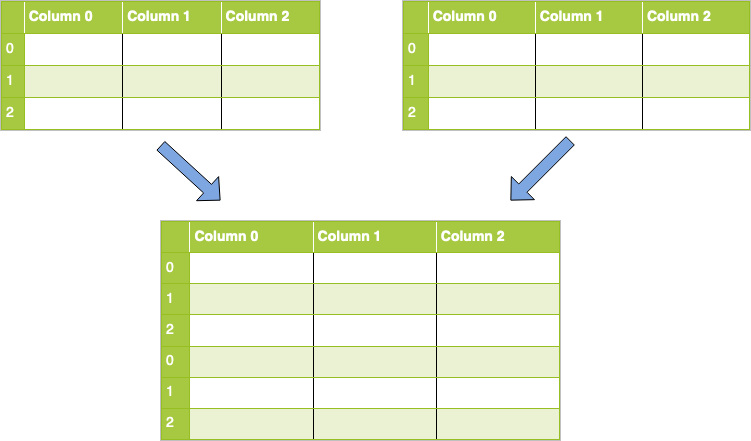


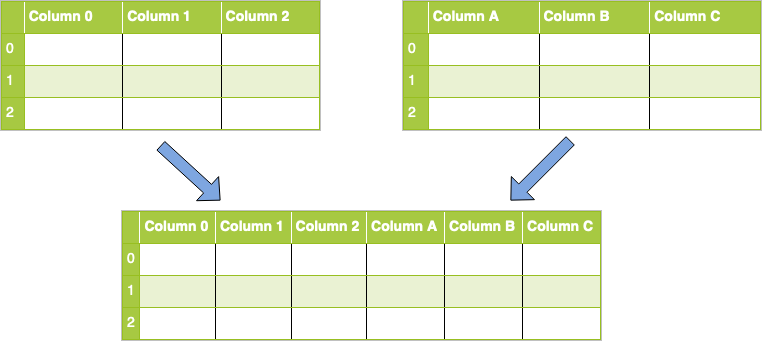

In [ ]:
pd.concat([day_one, day_two], axis = 1).pickup

,pickup,pickup
0,2019-03-24 00:12:23,2019-03-25 00:02:17
1,2019-03-24 00:12:23,2019-03-25 00:44:17
2,2019-03-24 00:13:15,2019-03-25 00:45:24
3,2019-03-24 00:14:55,2019-03-25 01:51:01
4,2019-03-24 00:15:26,2019-03-25 02:38:27
5,2019-03-24 00:27:46,2019-03-25 04:32:36
6,2019-03-24 00:44:57,2019-03-25 05:33:43
7,2019-03-24 00:56:39,2019-03-25 05:39:13
8,2019-03-24 01:08:20,2019-03-25 06:03:32
9,2019-03-24 01:13:51,2019-03-25 06:31:26


In [ ]:
pd.concat([day_one, day_two], ignore_index = True)

,pickup,dropoff,passengers,distance,fare,tip,payment,PickUpLocationID
0,2019-03-24 00:12:23,2019-03-24 00:13:56,1,0.15,3.00,0.00,cash,225
1,2019-03-24 00:12:23,2019-03-24 00:27:21,3,7.20,22.00,6.30,credit card,138
2,2019-03-24 00:13:15,2019-03-24 00:28:27,1,2.40,11.50,3.05,credit card,48
3,2019-03-24 00:14:55,2019-03-24 00:21:13,1,0.96,6.50,1.56,credit card,25
4,2019-03-24 00:15:26,2019-03-24 00:35:30,1,4.94,18.00,4.00,credit card,112
5,2019-03-24 00:27:46,2019-03-24 00:35:12,1,1.60,7.50,2.25,credit card,249
6,2019-03-24 00:44:57,2019-03-24 00:50:04,1,1.20,6.00,1.95,credit card,48
7,2019-03-24 00:56:39,2019-03-24 01:03:15,4,0.90,6.00,0.00,cash,230
8,2019-03-24 01:08:20,2019-03-24 01:08:34,1,0.02,2.50,0.00,cash,158
9,2019-03-24 01:13:51,2019-03-24 01:24:00,1,2.80,10.50,2.85,credit card,79


In [ ]:
np.nat == np.nan

AttributeError: module 'numpy' has no attribute 'nat'